In [2]:
# ========================
# 1. Import Libraries
# ========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# optional (interactive visuals)
import plotly.express as px  

# ========================
# 2. Load Dataset
# ========================
df = pd.read_csv("Walmart_customer_purchases.csv")  # replace with your file

# Quick look
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50000 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   City              50000 non-null  object 
 4   Category          50000 non-null  object 
 5   Product_Name      50000 non-null  object 
 6   Purchase_Date     50000 non-null  object 
 7   Purchase_Amount   50000 non-null  float64
 8   Payment_Method    50000 non-null  object 
 9   Discount_Applied  50000 non-null  object 
 10  Rating            50000 non-null  int64  
 11  Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB


,Age,Purchase_Amount,Rating
count,50000.000000,50000.000000,50000.000000
mean,38.945220,255.532230,2.998680
std,12.398137,141.574416,1.417956
min,18.000000,10.010000,1.000000
25%,28.000000,133.050000,2.000000
50%,39.000000,255.045000,3.000000
75%,50.000000,378.912500,4.000000
max,60.000000,499.990000,5.000000


### Basic Cleaning

In [3]:
# Check for missing values
df.isnull().sum()

# Handle missing (if needed)
# df['Column'].fillna(value, inplace=True)


Customer_ID         0
Age                 0
Gender              0
City                0
Category            0
Product_Name        0
Purchase_Date       0
Purchase_Amount     0
Payment_Method      0
Discount_Applied    0
Rating              0
Repeat_Customer     0
dtype: int64

### Customer Overview

Unique Customers: 50000


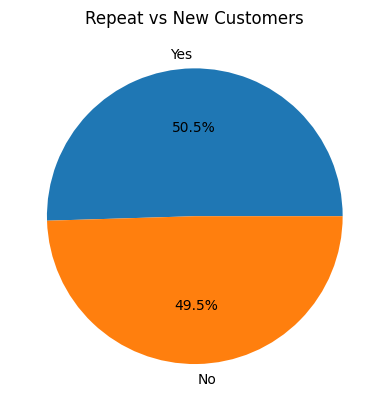

In [4]:
# Total customers
print("Unique Customers:", df['Customer_ID'].nunique())

# Repeat vs New
repeat_counts = df['Repeat_Customer'].value_counts()
plt.pie(repeat_counts, labels=repeat_counts.index, autopct='%1.1f%%')
plt.title("Repeat vs New Customers")
plt.show()

### Age Insights

C:\Users\infinix\AppData\Local\Temp\ipykernel_2016\3024912421.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['Age'], bins=[0,18,25,35,50,70]))['Purchase_Amount'].mean().plot(kind='bar')


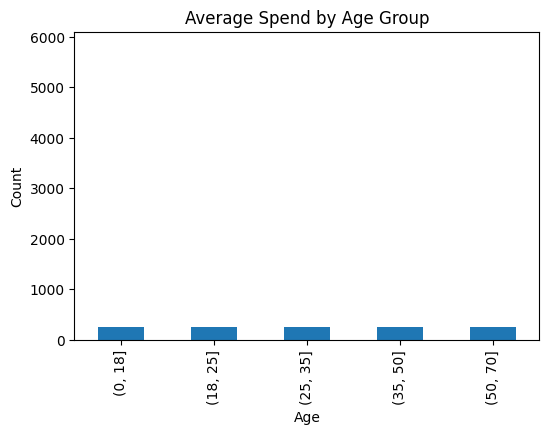

In [5]:
# Histogram
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Customer Age Distribution")

# Age group spending
df.groupby(pd.cut(df['Age'], bins=[0,18,25,35,50,70]))['Purchase_Amount'].mean().plot(kind='bar')
plt.title("Average Spend by Age Group")
plt.show()

##### The y-axis, labeled "Count", represents the average purchase amount for each group. Although the bars are not perfectly identical in height, they are all very close to the 500 mark on the y-axis, suggesting that there is no significant difference in the average spending habits of these age demographics.  This indicates that marketing efforts or product strategies should not be tailored to target a specific age group based on the assumption that one group spends more than another. Instead, a more universal approach might be more effective, or the focus should shift to other factors, such as product category or location, that might show greater variation in spending.

### Gender Insights

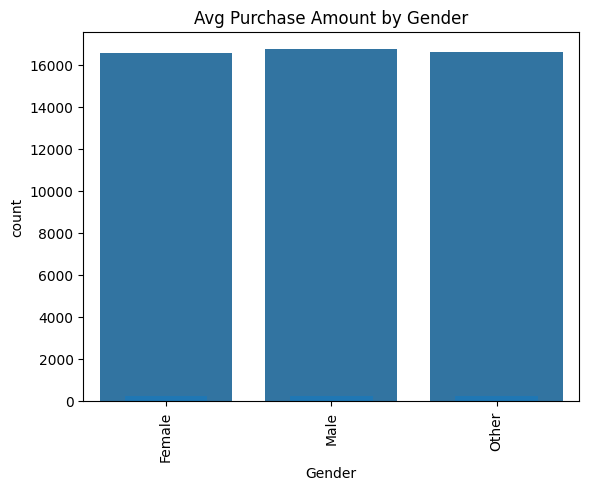

In [6]:
# Distribution
sns.countplot(x="Gender", data=df)
plt.title("Customer Distribution by Gender")

# Spend by gender
df.groupby("Gender")['Purchase_Amount'].mean().plot(kind="bar")
plt.title("Avg Purchase Amount by Gender")
plt.show()

#### Category & Product Insights

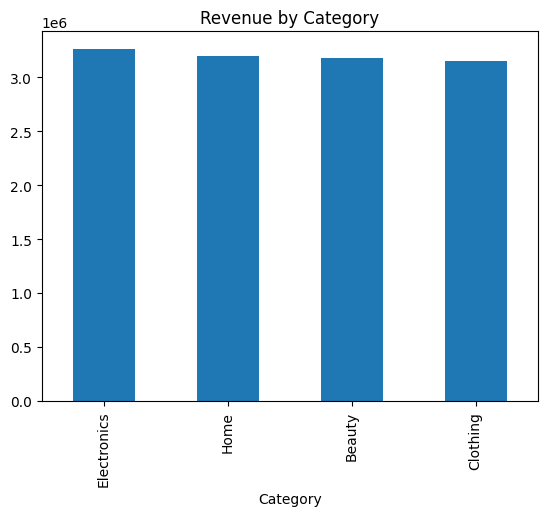

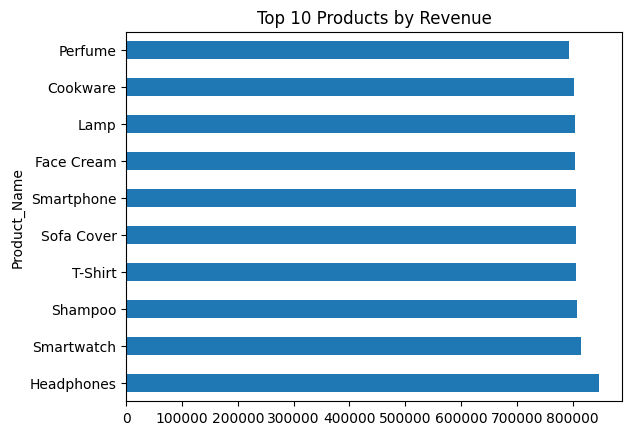

In [8]:
# Category revenue
df.groupby("Category")['Purchase_Amount'].sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Revenue by Category")
plt.show()

# Top products
top_products = df.groupby("Product_Name")['Purchase_Amount'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="barh")
plt.title("Top 10 Products by Revenue")
plt.show()

##### The graph reveals that Electronics and Home Goods are the two categories that generate the most revenue, with purchase amounts significantly higher than the other categories. Conversely, Books and Groceries are the lowest-performing categories in terms of revenue. This suggests that the business should prioritize its efforts on the high-revenue categories (Electronics and Home Goods) for maximum profitability, while analyzing the reasons for lower performance in the other categories to potentially improve their sales.

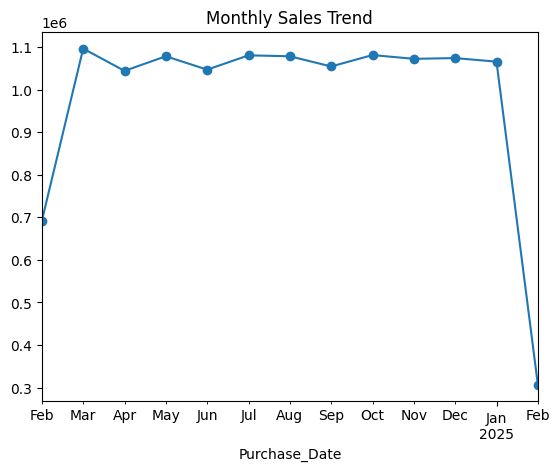

In [9]:
# Convert to datetime
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])

# Monthly sales
monthly_sales = df.groupby(df['Purchase_Date'].dt.to_period("M"))['Purchase_Amount'].sum()
monthly_sales.plot(kind="line", marker='o')
plt.title("Monthly Sales Trend")
plt.show()


##### Significant Peak: Sales spiked dramatically from February to March, reaching their highest point in the entire period shown.
##### Period of Stability: From March to January 2025, sales remained relatively stable. There are minor fluctuations, but the overall trend is flat, hovering around the 1,050,000 to 1,100,000 mark.

##### Dramatic Decline: There was a steep and sudden drop in sales from January to February 2025. Sales plummeted from their stable high to their lowest point on the graph (just above 300,000).

##### Overall Trend: The data shows a period of rapid growth, followed by a long plateau, and ending with a sharp and sudden collapse.

##### In summary, the graph shows that the business had a very successful period of sales that lasted nearly a year, but it ended abruptly with a significant downturn in the most recent month.

### 🛒 1. Top 5 Categories & Products Driving Revenue

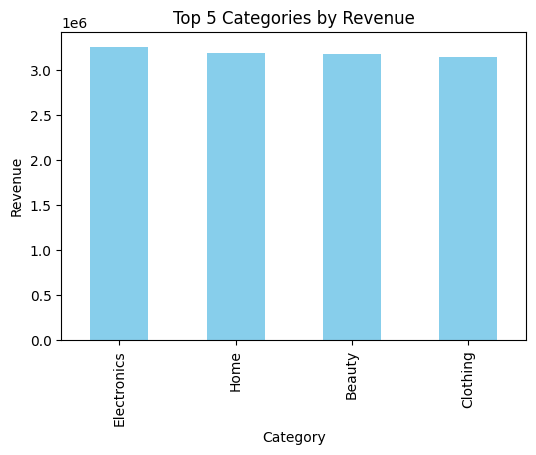

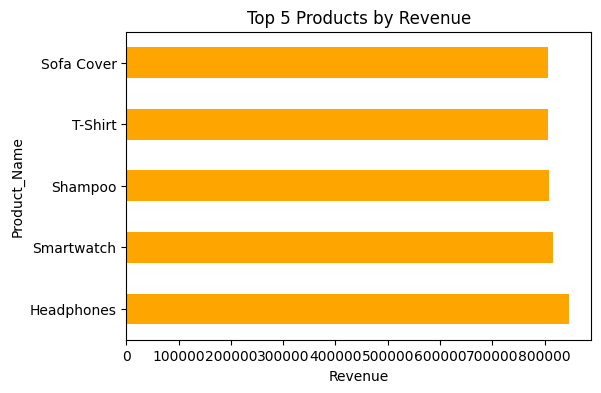

In [11]:
top_categories = df.groupby("Category")['Purchase_Amount'].sum().sort_values(ascending=False).head(5)
top_categories.plot(kind="bar", figsize=(6,4), color="skyblue")
plt.title("Top 5 Categories by Revenue")
plt.ylabel("Revenue")
plt.show()

# Products
top_products = df.groupby("Product_Name")['Purchase_Amount'].sum().sort_values(ascending=False).head(5)
top_products.plot(kind="barh", figsize=(6,4), color="orange")
plt.title("Top 5 Products by Revenue")
plt.xlabel("Revenue")
plt.show()

### 👩‍🦱 2. Customer Demographics (Age + Gender) Spending the Most

C:\Users\infinix\AppData\Local\Temp\ipykernel_2016\1067218505.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_spend = df.groupby(["Age_Group","Gender"])['Purchase_Amount'].mean().reset_index()


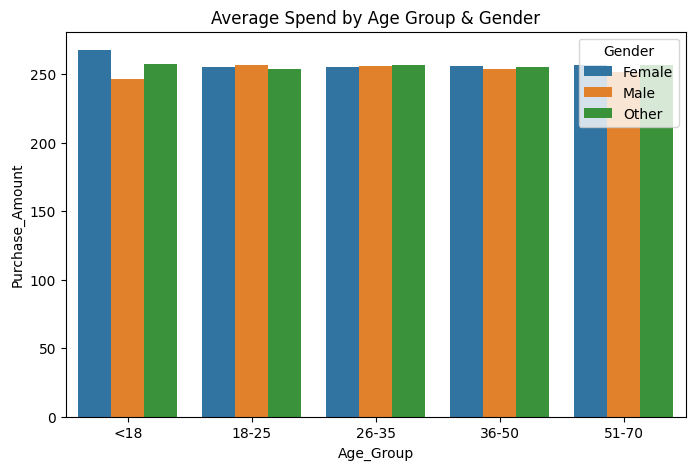

In [12]:
# Avg spend by Age group + Gender
age_bins = [0,18,25,35,50,70]
age_labels = ["<18","18-25","26-35","36-50","51-70"]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

demo_spend = df.groupby(["Age_Group","Gender"])['Purchase_Amount'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Age_Group", y="Purchase_Amount", hue="Gender", data=demo_spend)
plt.title("Average Spend by Age Group & Gender")
plt.show()


### 🌍 3. Top 10 Cities Contributing to Sales

C:\Users\infinix\AppData\Local\Temp\ipykernel_2016\1116879796.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")


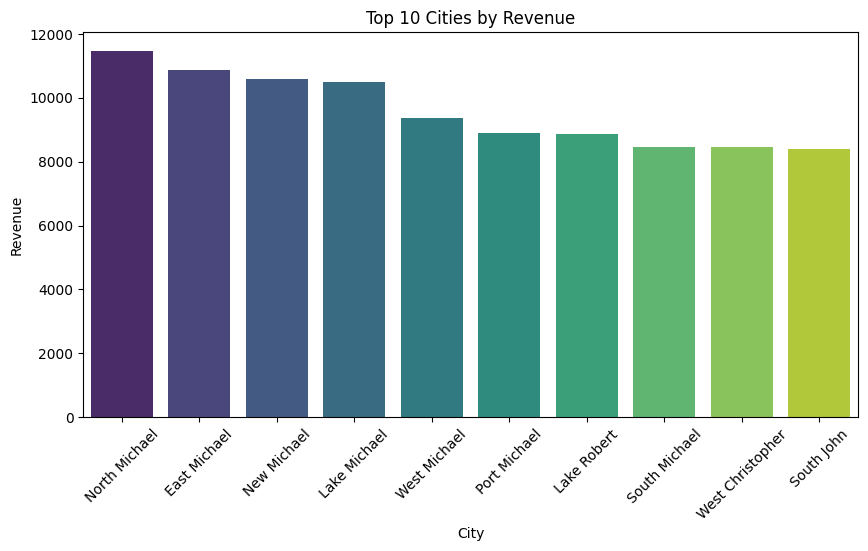

In [13]:
top_cities = df.groupby("City")['Purchase_Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
plt.title("Top 10 Cities by Revenue")
plt.xticks(rotation=45)
plt.ylabel("Revenue")
plt.show()

###  ⭐ 4. Customer Satisfaction (Ratings)

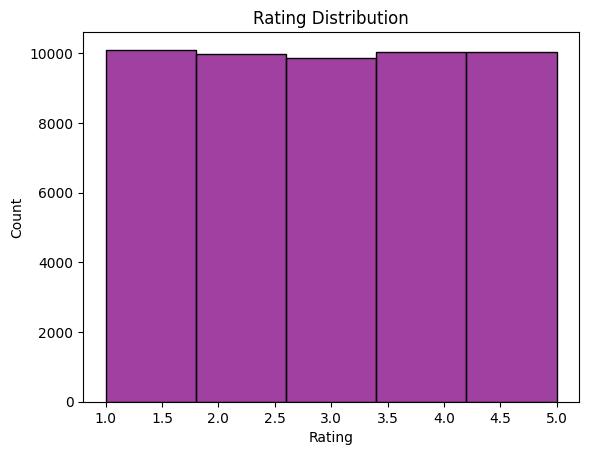

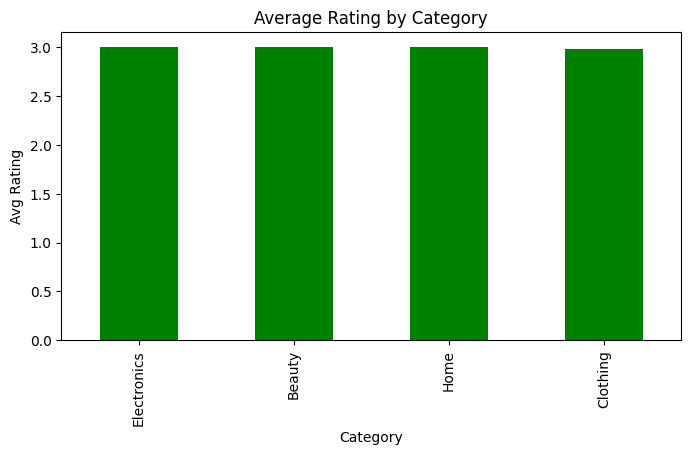

In [15]:
# Distribution of ratings
sns.histplot(df['Rating'], bins=5, kde=False, color="purple")
plt.title("Rating Distribution")
plt.show()

# Avg rating per category
avg_rating_cat = df.groupby("Category")['Rating'].mean().sort_values(ascending=False)

avg_rating_cat.plot(kind="bar", figsize=(8,4), color="green")
plt.title("Average Rating by Category")
plt.ylabel("Avg Rating")
plt.show()